In [1]:
# @author - Kelly Kang
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
data = pd.read_csv("titanic.csv")
df = pd.DataFrame(data)
df.head(5)










,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df = df.replace('male', 1)
df = df.replace('female', 0)
df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [4]:
df.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

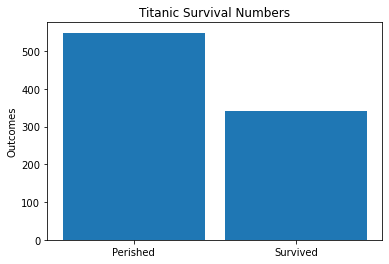

In [5]:
counts = df['Survived'].value_counts()
w=.35
plt.bar(x= [0,.4], height=counts, width=w)
plt.xticks([0,.4], ("Perished", "Survived"))
plt.ylabel("Outcomes")
plt.title("Titanic Survival Numbers")
plt.show()

In [28]:
mean = (df.loc[:, df.columns != 'Survived']).mean()
mean

Pclass     2.308642
Sex        0.647587
Age       29.699118
SibSp      0.523008
Parch      0.381594
Fare      32.204208
dtype: float64

In [29]:
df.groupby(df['Survived']).mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


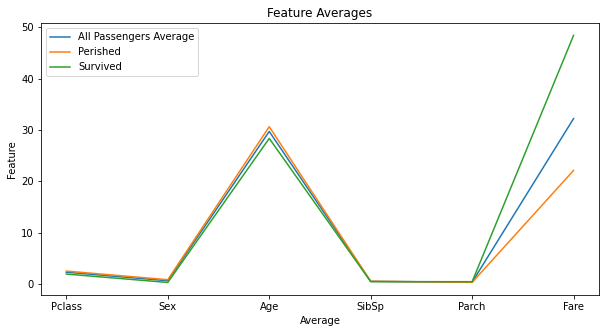

In [91]:
m_perish = (df.groupby(df['Survived']).mean()).iloc[0,:]
m_survived = (df.groupby(df['Survived']).mean()).iloc[1,:]
plt.figure(figsize = (10,5))
plt.plot(mean , label = "All Passengers Average")
plt.plot(m_perish, label = "Perished")
plt.plot(m_survived, label = "Survived")
plt.title("Feature Averages")
plt.xlabel("Average")
plt.ylabel("Feature")
plt.legend()
plt.show()



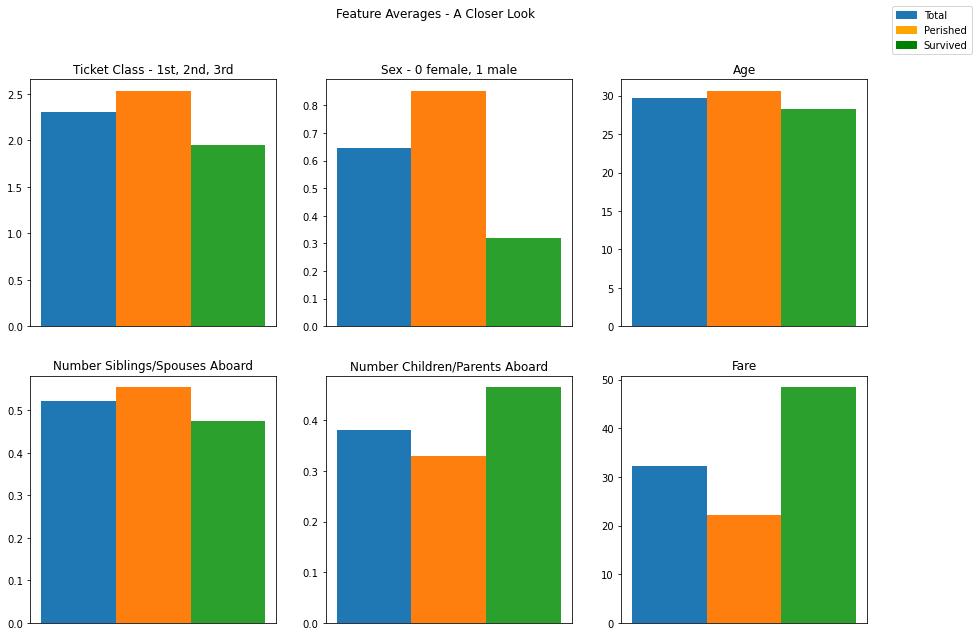

In [95]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle("Feature Averages - A Closer Look")
hold = np.zeros((1,3))
hold = [mean[0], m_perish[0], m_survived[0]]
ax[0,0].bar(0, mean[0], .05)
ax[0,0].bar(0.05, m_perish[0], .05)
ax[0,0].bar(0.1, m_survived[0], .05)
ax[0,0].set_title("Ticket Class - 1st, 2nd, 3rd")
ax[0,0].xaxis.set_visible(False)
ax[0,1].bar(0, mean[1], .05)
ax[0,1].bar(0.05, m_perish[1], .05)
ax[0,1].bar(0.1, m_survived[1], .05)
ax[0,1].set_title("Sex - 0 female, 1 male")
ax[0,1].xaxis.set_visible(False)
ax[0,2].bar(0, mean[2], .05)
ax[0,2].bar(0.05, m_perish[2], .05)
ax[0,2].bar(0.1, m_survived[2], .05)
ax[0,2].set_title("Age")
ax[0,2].xaxis.set_visible(False)
ax[1,0].bar(0, mean[3], .05)
ax[1,0].bar(0.05, m_perish[3], .05)
ax[1,0].bar(0.1, m_survived[3], .05)
ax[1,0].set_title("Number Siblings/Spouses Aboard")
ax[1,0].xaxis.set_visible(False)
ax[1,1].bar(0, mean[4], .05)
ax[1,1].bar(0.05, m_perish[4], .05)
ax[1,1].bar(0.1, m_survived[4], .05)
ax[1,1].set_title("Number Children/Parents Aboard")
ax[1,1].xaxis.set_visible(False)
ax[1,2].bar(0, mean[5], .05)
ax[1,2].bar(0.05, m_perish[5], .05)
ax[1,2].bar(0.1, m_survived[5], .05)
ax[1,2].set_title("Fare")
ax[1,2].xaxis.set_visible(False)

Per = mpatches.Patch(color='orange', label='Perished')
Tot = mpatches.Patch(color='#1f77b4', label='Total')
Sur = mpatches.Patch(color='green', label='Survived')
plt.legend(handles=[Tot,Per, Sur], loc = (1.1,2.3))

plt.show()

In [30]:
hold = df.corr()
hold.iloc[:6,6]

Pclass   -0.338481
Sex      -0.543351
Age      -0.077221
SibSp    -0.035322
Parch     0.081629
Fare      0.257307
Name: Survived, dtype: float64

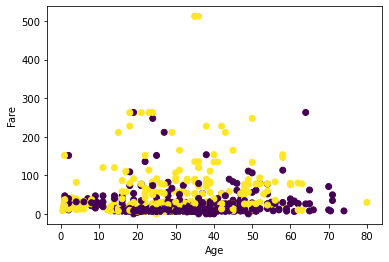

In [98]:
plt.scatter(df['Age'], df['Fare'], c = df['Survived'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()